In [1]:
!pip install pandas matplotlib seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [9]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [10]:
df.drop('Cabin', axis=1, inplace=True)

In [11]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [12]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

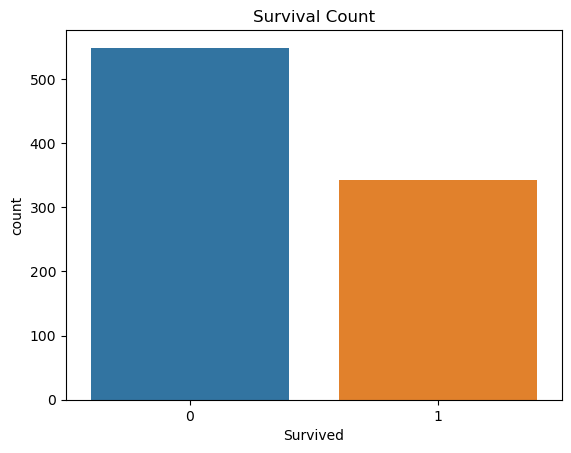

In [13]:
# survival count 
df['Survived'].value_counts()
df['Survived'].value_counts(normalize=True)  #percentage 
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()  

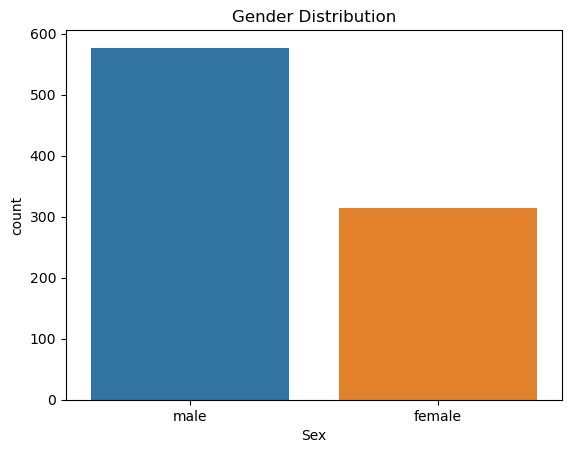

In [14]:
#sex
df['Sex'].value_counts()
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')
plt.show()

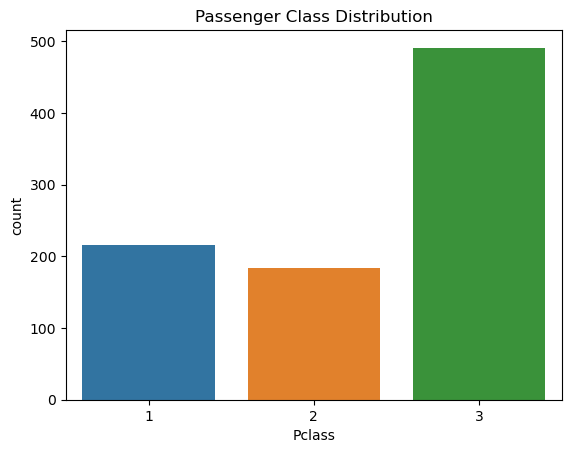

In [15]:
#Pclass (passenger class)
df['Pclass'].value_counts()
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()

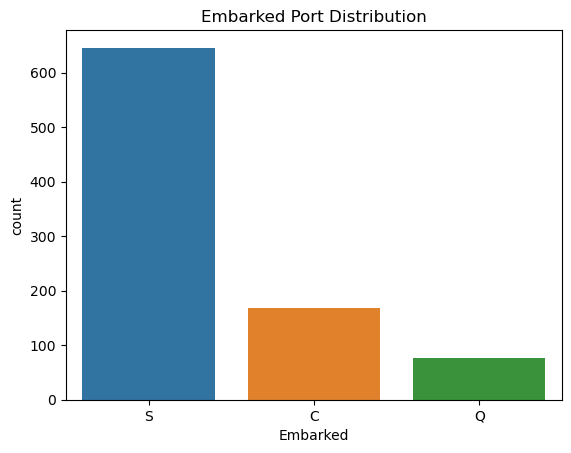

In [16]:
#Embarked C= cherbourg(france), Q= Queenstown(ireland), S= southampton(england)
df['Embarked'].value_counts()
sns.countplot(x='Embarked', data=df)
plt.title('Embarked Port Distribution')
plt.show()

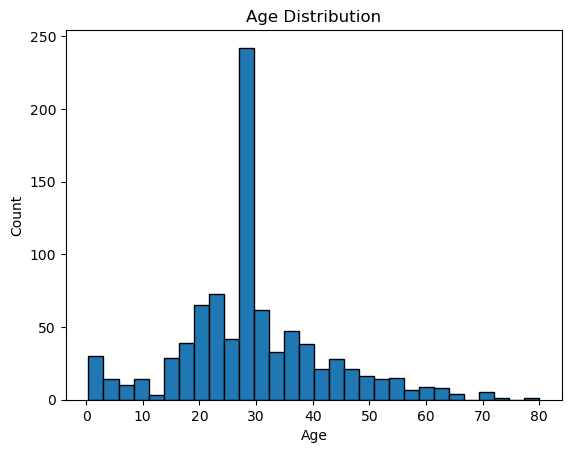

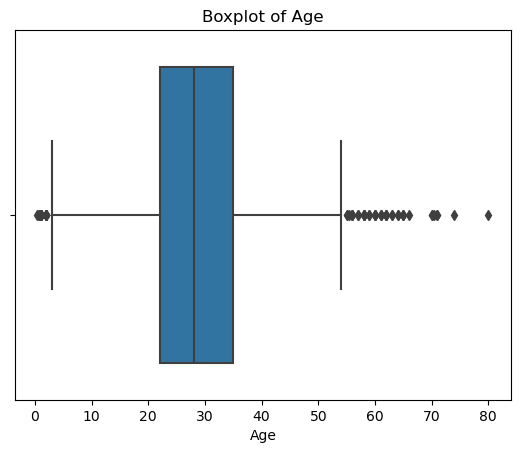

In [17]:
df['Age'].describe()
plt.hist(df['Age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()

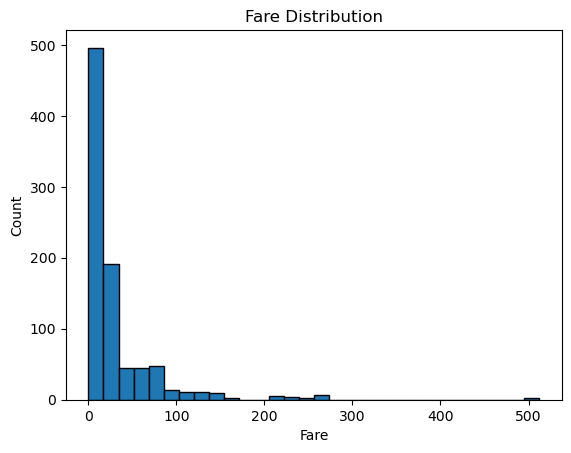

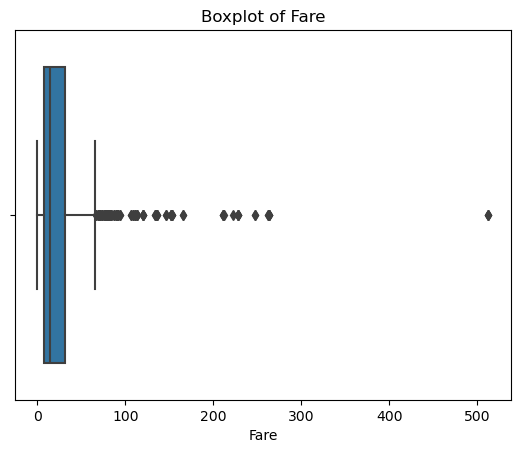

In [18]:
df['Fare'].describe()
plt.hist(df['Fare'], bins=30, edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare')
plt.show()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


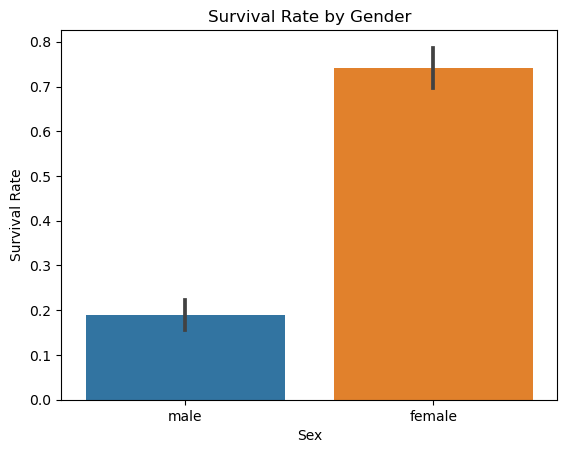

In [19]:
# Grouping
print(df.groupby('Sex')['Survived'].mean())

# Visualization
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


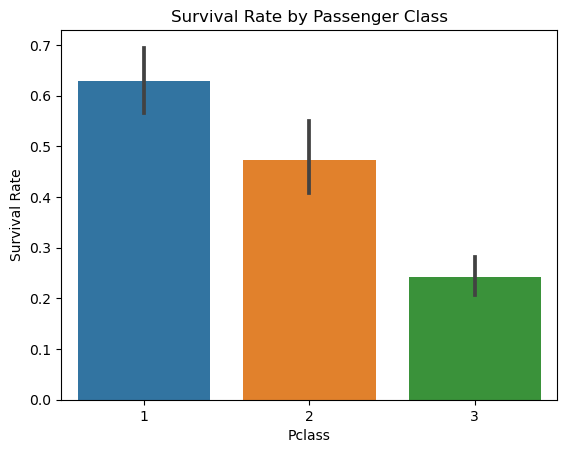

In [20]:
print(df.groupby('Pclass')['Survived'].mean())

sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


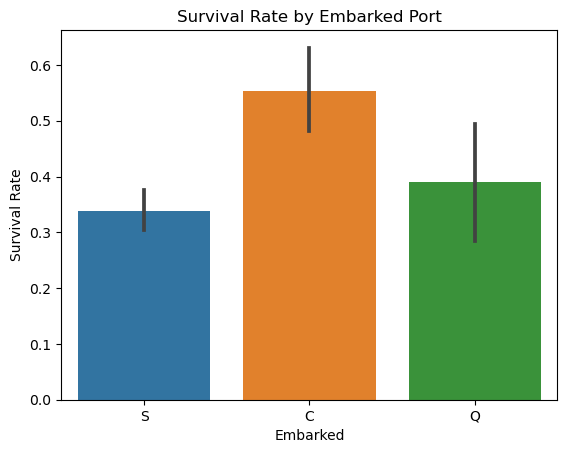

In [21]:
print(df.groupby('Embarked')['Survived'].mean())

sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Embarked Port')
plt.ylabel('Survival Rate')
plt.show()


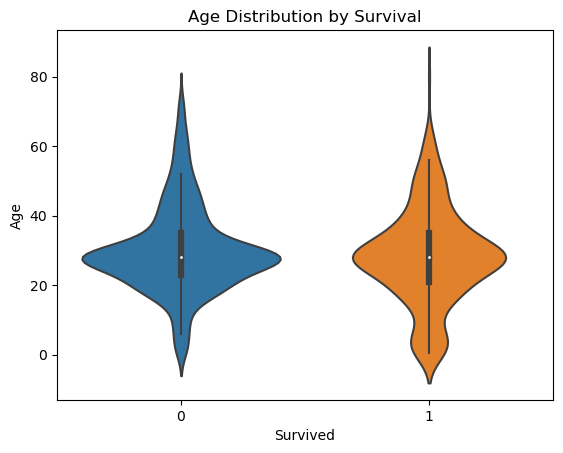

In [22]:
sns.violinplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.show()


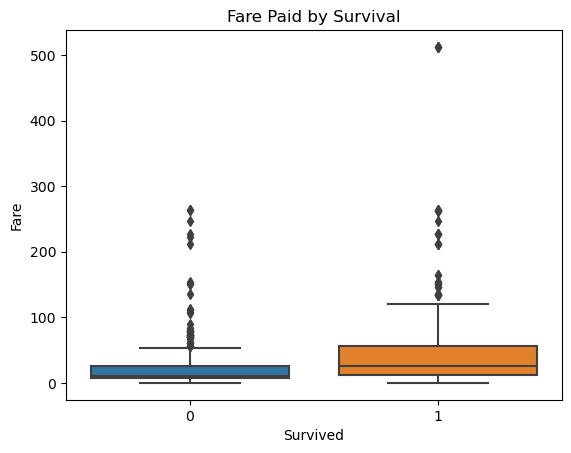

In [23]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Paid by Survival')
plt.show()


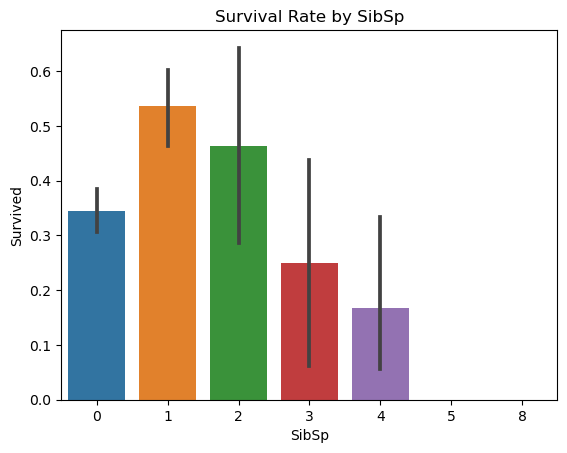

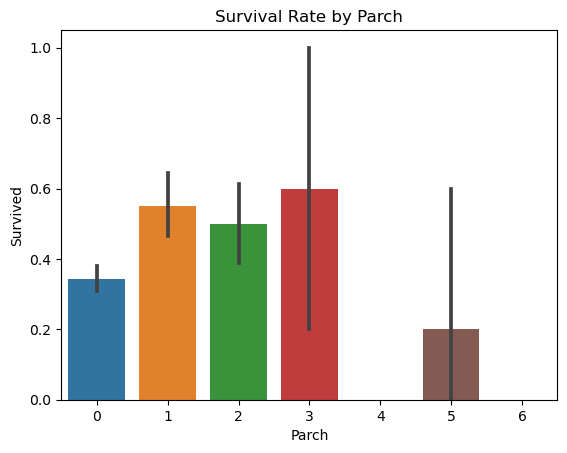

In [24]:
sns.barplot(x='SibSp', y='Survived', data=df)
plt.title('Survival Rate by SibSp')
plt.show()

sns.barplot(x='Parch', y='Survived', data=df)
plt.title('Survival Rate by Parch')
plt.show()


In [25]:
# Compute correlation
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


ValueError: could not convert string to float: 'male'

In [26]:
numeric_df = df.select_dtypes(include=['number'])  # filters only numerical columns


In [27]:
corr_matrix = numeric_df.corr()


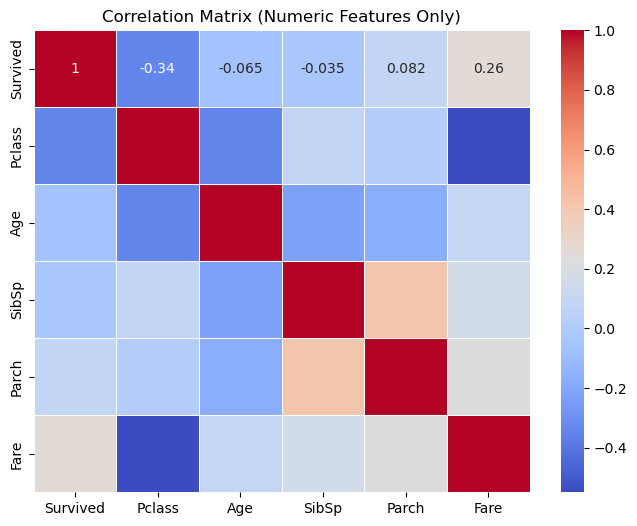

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()


In [29]:
df_encoded = df.copy()
df_encoded['Sex'] = df_encoded['Sex'].map({'male': 0, 'female': 1})
df_encoded['Embarked'] = df_encoded['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


C:\Users\vashi\Documents\Custom Office Templates\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vashi\Documents\Custom Office Templates\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vashi\Documents\Custom Office Templates\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vashi\Documents\Custom Office Templates\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

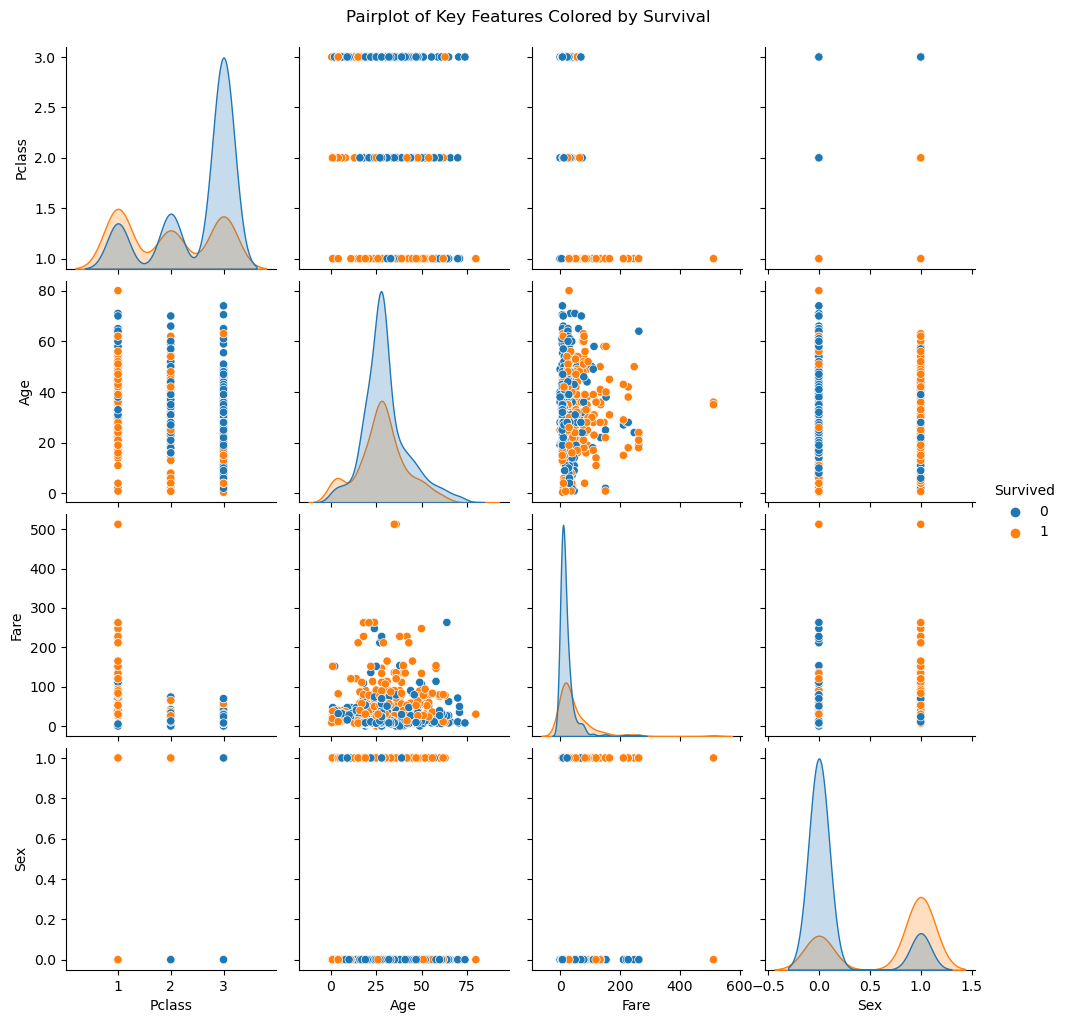

In [30]:
sns.pairplot(df_encoded[['Survived', 'Pclass', 'Age', 'Fare', 'Sex']], hue='Survived')
plt.suptitle("Pairplot of Key Features Colored by Survival", y=1.02)
plt.show()


In [31]:
pd.pivot_table(df, values='Survived', index=['Sex', 'Pclass'], aggfunc='mean')


Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

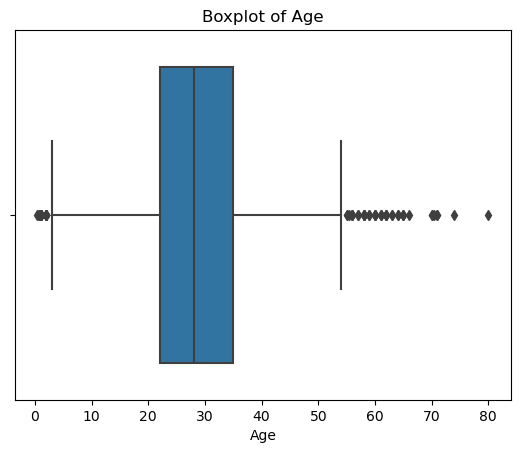

In [32]:
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age")
plt.show()


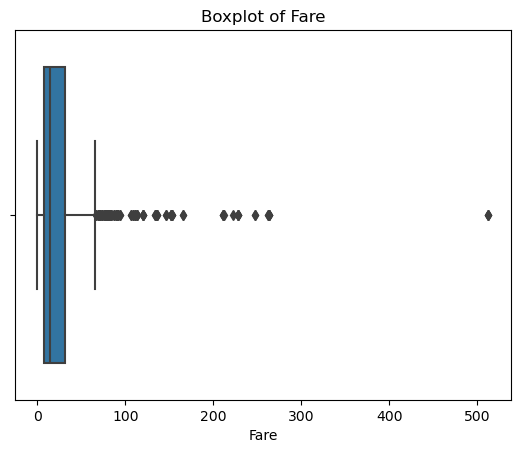

In [33]:
sns.boxplot(x=df['Fare'])
plt.title("Boxplot of Fare")
plt.show()


In [34]:
print("Skewness of Age:", df['Age'].skew())
print("Skewness of Fare:", df['Fare'].skew())


Skewness of Age: 0.5102446555756495
Skewness of Fare: 4.787316519674893


In [35]:
import numpy as np

df['Fare_log'] = np.log1p(df['Fare'])  # log(1 + fare) handles zero values


C:\Users\vashi\Documents\Custom Office Templates\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vashi\Documents\Custom Office Templates\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


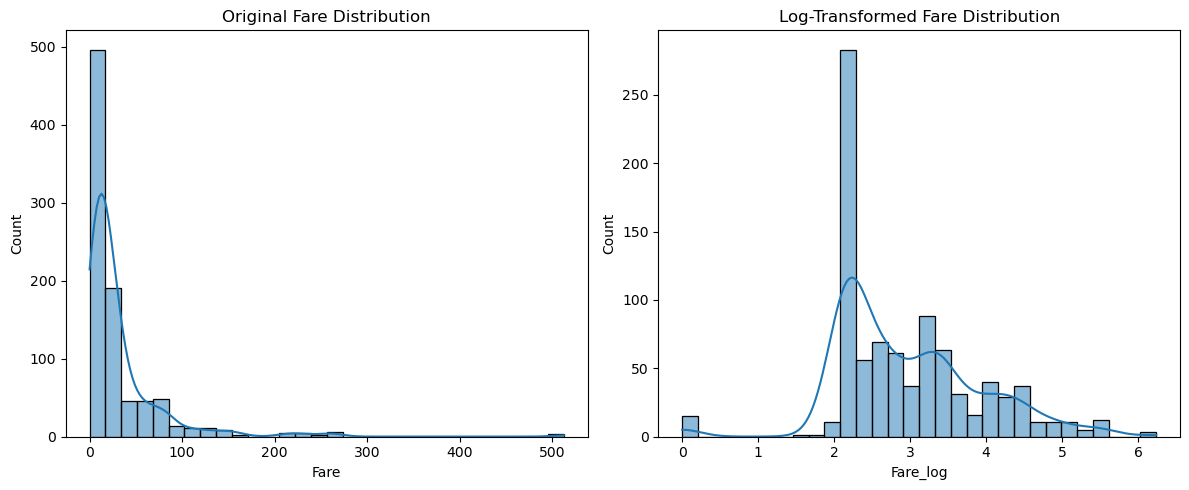

In [36]:
plt.figure(figsize=(12,5))

# Original
plt.subplot(1, 2, 1)
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title("Original Fare Distribution")

# Transformed
plt.subplot(1, 2, 2)
sns.histplot(df['Fare_log'], bins=30, kde=True)
plt.title("Log-Transformed Fare Distribution")

plt.tight_layout()
plt.show()
